# CA06: Customer Segmentation using K-Means Clustering

1. Load the dataset and perform exploratory data analysis (EDA): a. Import the 
necessary libraries (pandas, numpy, matplotlib, seaborn) b. Load the dataset 
using pandas and display the first few rows c. Check for missing values and 
handle them appropriately d. Visualize the distribution of features using 
histograms or boxplots

In [34]:
#a. Import the necessary libraries (pandas, numpy, matplotlib, seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#b. Load the dataset using pandas and display the first few rows
df=pd.read_csv('https://raw.githubusercontent.com/ArinB/MSBA-CA-Data/main/CA06/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
#c. Check for missing values and handle them appropriately 
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [37]:
df.dropna(inplace=True)

In [38]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


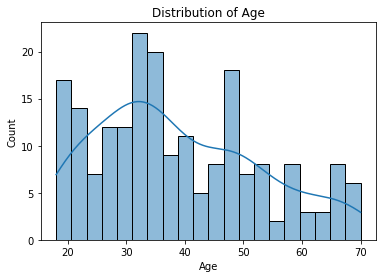

In [39]:
#d. Visualize the distribution of features using histograms or boxplots
sns.histplot(data=df, x="Age", kde=True, bins=20)
plt.title("Distribution of Age")
plt.show()

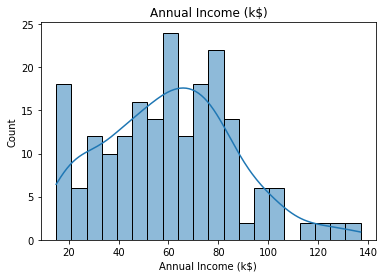

In [40]:
sns.histplot(data=df, x="Annual Income (k$)", kde=True, bins=20)
plt.title("Annual Income (k$)")
plt.show()

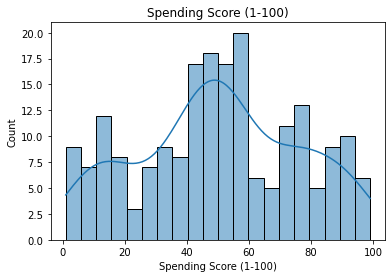

In [41]:
sns.histplot(data=df, x="Spending Score (1-100)", kde=True, bins=20)
plt.title("Spending Score (1-100)")
plt.show()

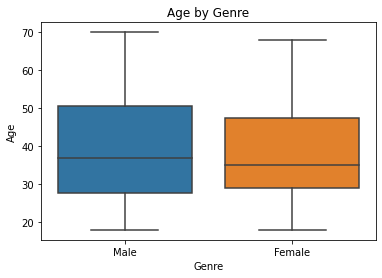

In [42]:
sns.boxplot(x=df['Genre'],y=df["Age"])
plt.title("Age by Genre")
plt.show()

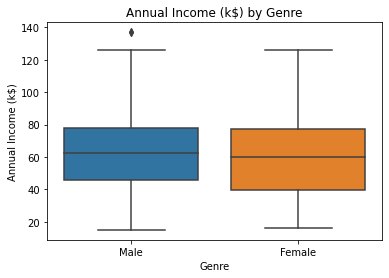

In [43]:
sns.boxplot(x=df['Genre'],y=df["Annual Income (k$)"])
plt.title("Annual Income (k$) by Genre")
plt.show()

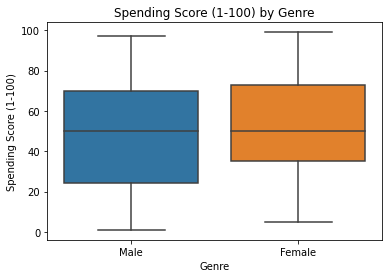

In [44]:
sns.boxplot(x=df['Genre'],y=df["Spending Score (1-100)"])
plt.title("Spending Score (1-100) by Genre")
plt.show()

2. Prepare the data for clustering: a. Perform any necessary feature scaling 
(StandardScaler or MinMaxScaler) b. Choose the appropriate features for 
clustering (you may start with 'Annual Income' and 'Spending Score') c. Create a 
new DataFrame with only the selected features

In [45]:
#a. Perform any necessary feature scaling (StandardScaler or MinMaxScaler) 
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X_scaled = scaler.fit_transform(X)

In [47]:
# b. Choose the appropriate features for clustering (you may start with 'Annual Income' and 'Spending Score')
# I choose 'Annual Income' and 'Spending Score' for clustering, because I made standardscaler for them

In [48]:
# c. Create a new DataFrame with only the selected features
X=pd.DataFrame(data=X_scaled, columns=["Annual Income (k$)", "Spending Score (1-100)"])

3. Implement k-means clustering: a. Import the KMeans class from the 
sklearn.cluster module b. Use the Silhouette Method to determine the optimal 
number of clusters c. Train the KMeans model with the optimal number of 
clusters d. Obtain the cluster assignments for each data point

In [49]:
#a. Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

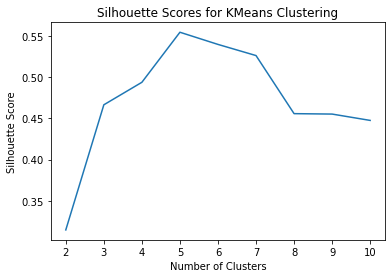

In [50]:
# b. Use the Silhouette Method to determine the optimal number of clusters
# I use a for loop to fit KMeans models with 2-10 clusters and computed the Silhouette Score for each
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title("Silhouette Scores for KMeans Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [51]:
# So from this plot of Silhouette Score, I got the optimal number of clusters is 5

In [52]:
#c. Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [53]:
#d. Obtain the cluster assignments for each data point
df["Cluster"] = kmeans.labels_

4. Visualize and analyze the clusters: a. Create a scatter plot of the selected features, 
colored by cluster assignment b. Interpret the clusters and provide a brief 
description of each cluster c. (Optional) Perform the same analysis with different 
sets of features and compare the results

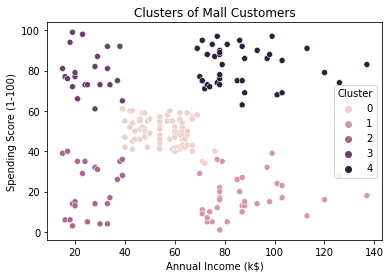

In [54]:
#a. Create a scatter plot of the selected features, colored by cluster assignment
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster")
plt.title("Clusters of Mall Customers")
plt.show()

In [55]:
#b. Interpret the clusters and provide a brief description of each cluster
print(df.groupby("Cluster").mean())

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        164.371429  41.114286           88.200000               17.114286
2         23.000000  45.217391           26.304348               20.913043
3         23.090909  25.272727           25.727273               79.363636
4        162.000000  32.692308           86.538462               82.128205


In [56]:
#  c. (Optional) Perform the same analysis with different sets of features and compare the results
# I choose Age and Annual Income (k$)
A = df[["Age", "Annual Income (k$)"]]
A_scaled = scaler.fit_transform(A)

In [57]:
silhouette_scores1 = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(A_scaled)
    score = silhouette_score(A_scaled, kmeans.labels_)
    silhouette_scores1.append(score)

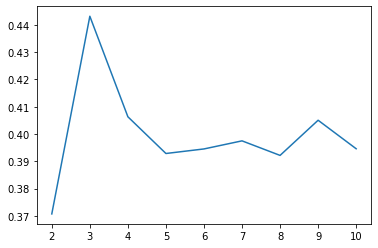

In [59]:
plt.plot(range(2, 11), silhouette_scores1)
plt.show()

In [58]:
optimal_k = silhouette_scores1.index(max(silhouette_scores1)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(A_scaled)

KMeans(n_clusters=3, random_state=42)

In [60]:
df["Cluster"] = kmeans.labels_

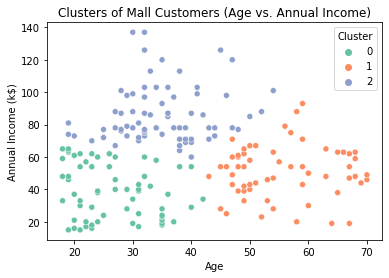

In [61]:
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Cluster", palette="Set2")
plt.title("Clusters of Mall Customers (Age vs. Annual Income)")
plt.show()

5. Write a report summarizing your findings:

a. Describe the dataset and its 
attributes

The dataset consists of 200 rows and 5 columns. The columns are: CustomerID (a unique identifier for each customer), Gender (male or female), Age (age of the customer), Annual Income (k$) (the annual income of the customer in thousands of dollars), and Spending Score (1-100) (a score assigned by the mall based on customer behavior and spending nature).

b. Detail the steps taken for data preprocessing, feature selection, and 
scaling

First, Handling missing values by dropping through Pandas.and making The distribution of the features was then visualized using histograms and boxplots. Feature scaling was performed using StandardScaler. The selected features for clustering were "Annual Income" and "Spending Score". A new DataFrame was created with only these selected features.

c. Explain the process of determining the optimal number of clusters d. 
Describe the clusters and their characteristics

Determining the optimal number of clusters. Calculating the Silhouette Score for each k value ranging from 2 to 10. The k value with the highest Silhouette Score was chosen as the optimal number of clusters.

e. Discuss any insights or 
recommendations based on your analysis

Based on the analysis, it can be seen that the mall has a diverse customer base. The mall can use these clusters to tailor their marketing strategies to each group of customers. For example, high spenders can be targeted with premium offers, while low spenders can be targeted with discounts or offers on lower-priced items. Additionally, the mall can use these clusters to identify which groups of customers are more likely to respond to certain marketing campaigns.